C:\Users\Bala Ganesh\AppData\Local\Temp\ipykernel_4948\1997435427.py:31: DeprecationWarning: Call to deprecated function stored_results. Reason: The property counterpart 'stored_results' will be added in a future release, and this method will be removed.
  for result in cursor.stored_results():
C:\Users\Bala Ganesh\AppData\Local\Temp\ipykernel_4948\1997435427.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\Bala Ganesh\AppData\Local\Temp\ipykernel_4948\1997435427.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
C:\Users\Bala Ganesh\AppData\Local\Temp\ipykernel_4948\1997435427.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after se

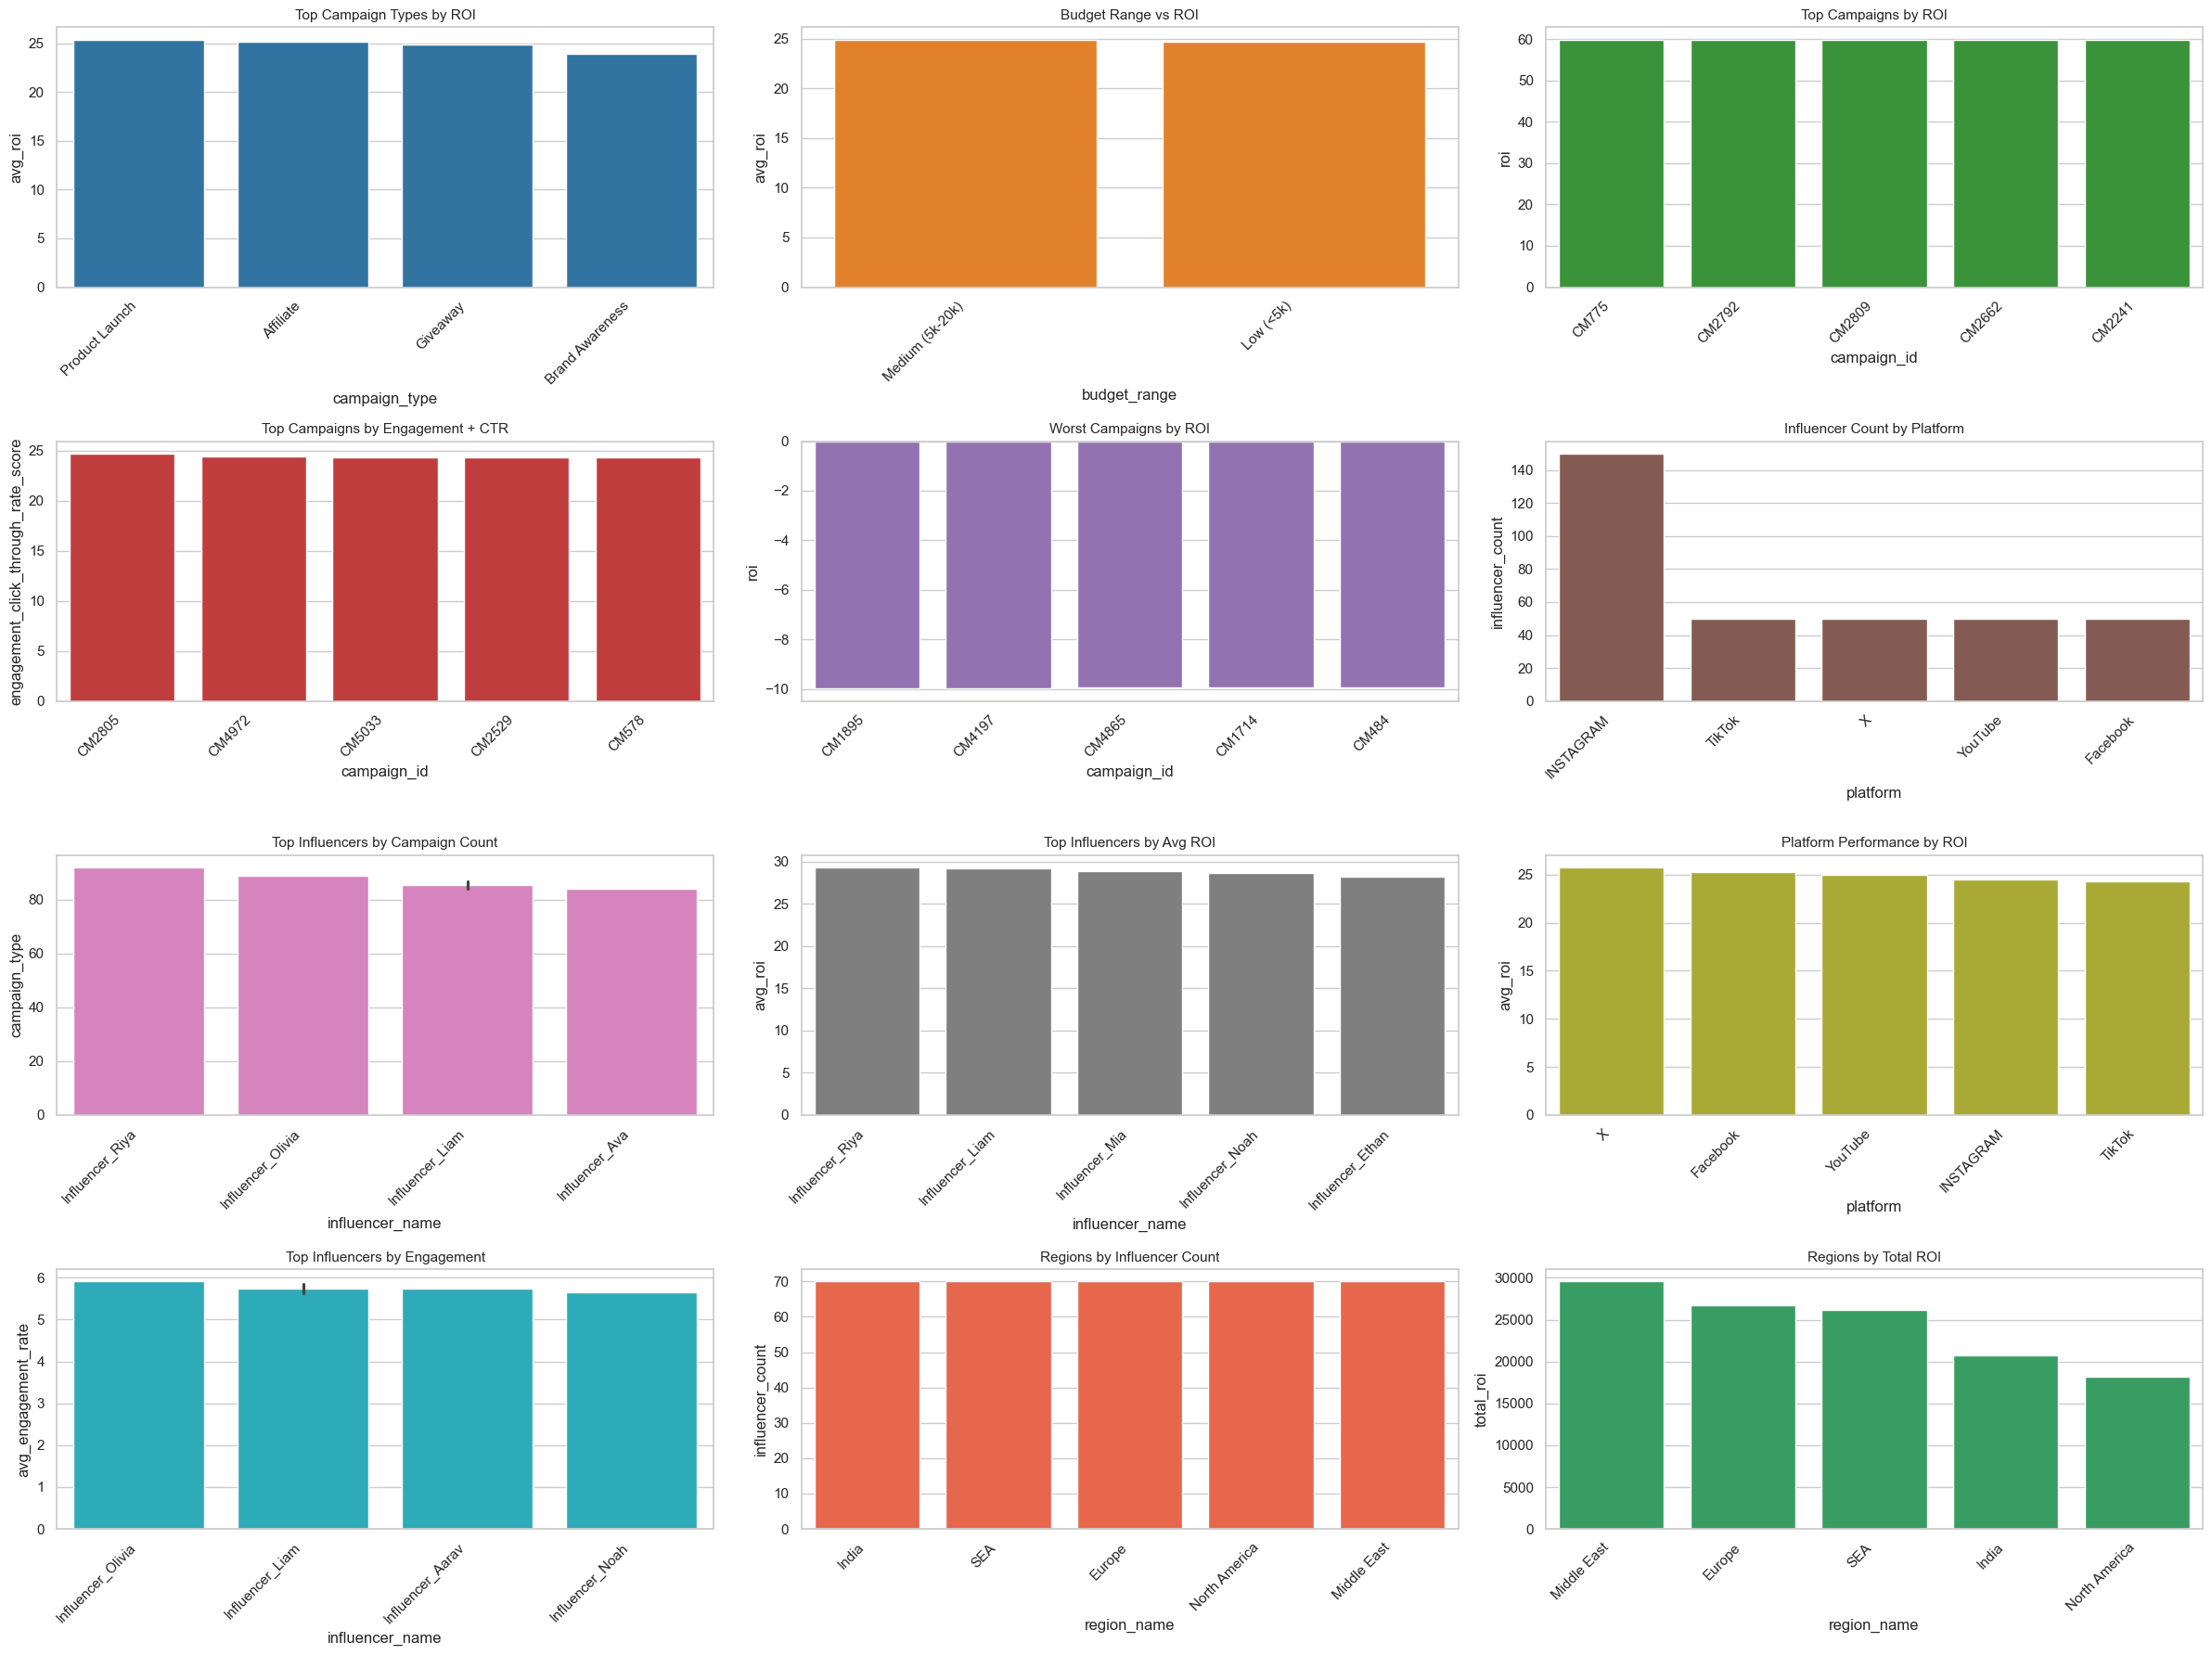

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database Credentials
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "Bala@0505",
    "database": "cyber_marketing"
}

sns.set(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (24, 18)

# 🎨 Unique color palette (12 different charts = 12 colors)
chart_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#ff5733", "#27ae60"
]

# Function to execute stored procedures
def run_stored_procedure(proc_name, params=None):
    try:
        conn = mysql.connector.connect(**db_config)
        cursor = conn.cursor()
        cursor.callproc(proc_name, params)
        for result in cursor.stored_results():
            rows = result.fetchall()
            cols = [col[0] for col in result.description]
            return pd.DataFrame(rows, columns=cols)
    except Error as e:
        print(f"Error executing {proc_name}: {e}")
        return None
    finally:
        cursor.close()
        conn.close()

# Fetch all stored procedure outputs
p_limit = 5
data = {
    "GetTopCampaignTypesByROI": run_stored_procedure("GetTopCampaignTypesByROI", (p_limit,)),
    "GetBudgetBinsROI": run_stored_procedure("GetBudgetBinsROI", (p_limit,)),
    "GetTopCampaignsByROI": run_stored_procedure("GetTopCampaignsByROI", (p_limit,)),
    "GetTopCampaignsByEngagementCTR": run_stored_procedure("GetTopCampaignsByEngagementCTR", (p_limit,)),
    "GetWorstCampaignsByROI": run_stored_procedure("GetWorstCampaignsByROI", (p_limit,)),
    "GetTopPlatformsByInfluencerCount": run_stored_procedure("GetTopPlatformsByInfluencerCount", (p_limit,)),
    "GetTopInfluencersByCampaignCount": run_stored_procedure("GetTopInfluencersByCampaignCount", (p_limit,)),
    "GetTopInfluencersByAvgROI": run_stored_procedure("GetTopInfluencersByAvgROI", (p_limit,)),
    "GetPlatformPerformanceByROI": run_stored_procedure("GetPlatformPerformanceByROI", (p_limit,)),
    "GetTopInfluencersByEngagement": run_stored_procedure("GetTopInfluencersByEngagement", (p_limit,)),
    "GetTopRegionsByInfluencerCount": run_stored_procedure("GetTopRegionsByInfluencerCount", (p_limit,)),
    "GetTopRegionsByTotalROI": run_stored_procedure("GetTopRegionsByTotalROI", (p_limit,))
}

# Helper function: Safe barplot
def safe_barplot(ax, df, x_col, y_col, title, color, rotate_xticks=False):
    if df is None or df.empty:
        ax.text(0.5, 0.5, "No Data Available", ha="center", va="center", fontsize=12)
        ax.set_title(title)
        ax.set_xticks([])
        ax.set_yticks([])
        return
    sns.barplot(data=df, x=x_col, y=y_col, ax=ax, color=color)
    ax.set_title(title, fontsize=11)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    if rotate_xticks:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Create dashboard layout
fig, axes = plt.subplots(4, 3)
axes = axes.ravel()
idx = 0

# 12 Chart Visualizations with Different Colors
safe_barplot(axes[idx], data["GetTopCampaignTypesByROI"], "campaign_type", "avg_roi",
             "Top Campaign Types by ROI", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetBudgetBinsROI"], "budget_range", "avg_roi",
             "Budget Range vs ROI", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopCampaignsByROI"], "campaign_id", "roi",
             "Top Campaigns by ROI", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopCampaignsByEngagementCTR"], "campaign_id",
             "engagement_click_through_rate_score",
             "Top Campaigns by Engagement + CTR", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetWorstCampaignsByROI"], "campaign_id", "roi",
             "Worst Campaigns by ROI", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopPlatformsByInfluencerCount"], "platform",
             "influencer_count", "Influencer Count by Platform", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopInfluencersByCampaignCount"], "influencer_name",
             "campaign_type", "Top Influencers by Campaign Count", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopInfluencersByAvgROI"], "influencer_name",
             "avg_roi", "Top Influencers by Avg ROI", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetPlatformPerformanceByROI"], "platform",
             "avg_roi", "Platform Performance by ROI", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopInfluencersByEngagement"], "influencer_name",
             "avg_engagement_rate", "Top Influencers by Engagement", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopRegionsByInfluencerCount"], "region_name",
             "influencer_count", "Regions by Influencer Count", chart_colors[idx], True); idx+=1

safe_barplot(axes[idx], data["GetTopRegionsByTotalROI"], "region_name",
             "total_roi", "Regions by Total ROI", chart_colors[idx], True); idx+=1

plt.tight_layout()
plt.show()
